<a href="https://colab.research.google.com/github/ItshMoh/Goverment_bot/blob/main/Easy_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install -q easyocr
!pip install -q langchain
!pip install -q faiss-cpu
!pip install -q langchain-google-genai

In [8]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image
from langchain_community.vectorstores import FAISS
from langchain_google_genai import ChatGoogleGenerativeAI
import getpass
import os
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.messages import HumanMessage
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder


In [9]:
rcParams['figure.figsize'] = 8, 16

In [ ]:
rcParams['figure.figsize'] = 8, 16
reader = easyocr.Reader(['en', 'hi'])
file_name = "/content/Screenshot 2024-04-10 022151.png"
Image(file_name)
output = reader.readtext(file_name)
# output


In [11]:
file_name = "/content/Screenshot 2024-04-10 022151.png"

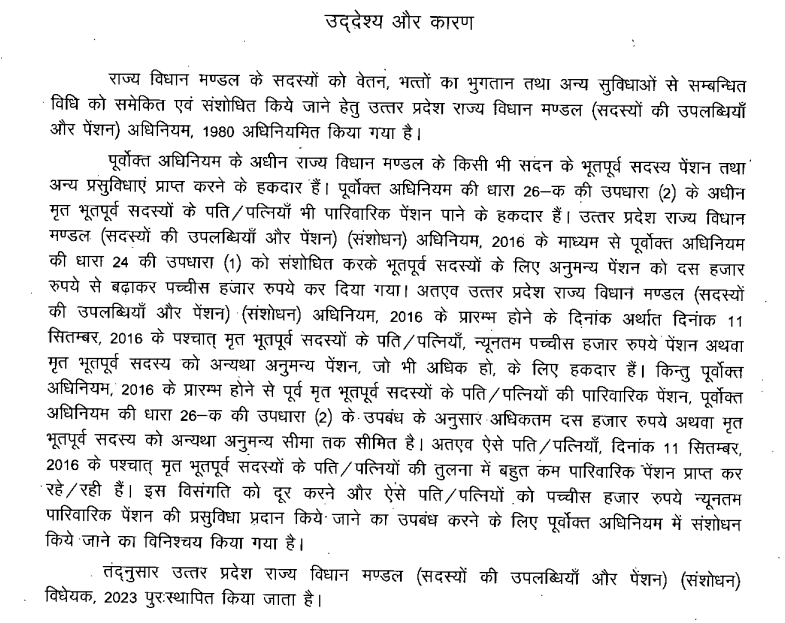

In [12]:
Image(file_name)

In [ ]:
text_only_output = [result[1] for result in output]  # Extracting only the text from the output

text_only_output

In [14]:
#The above code joins the whole text into string.
# hindi_text = ' '.join([result[1] for result in output])

# # print("Hindi Text:")
# print(hindi_text)

उददेश्य और कारण राज्य विधान मण्डल क सदस्यों को वेतन भत्तों का भुगतान तथा अन्य सुविधाओं सम्बन्धित विधि को सनेकित एवं संशोधित किये जाने हेतु उत्तर प्रदेश राज्य विधान नण्डल सदस्यों की उपलब्धियाँ और पेंशन) अधिनियम  १९८० अधिनियमित किया है | पूर्वोक्त अधिनियम के अधीन राज्य विधान मण्डल के किसी भी सदन के भूतपूर्व सदस्य पेंशन तथा अन्य प्रसुविधाएं प्राप्त करने के हकदार हैं पूर्वोक्त अधिनियम की धारा २६-क की उपधारा  के अधीन मृत भूतपूर्व सदस्यों के पति / पल्ियाँ भी पारिवारिक पेंशन पाने के हकदार हैं| उत्तर प्रदेश राज्य दिधान मण्डल (सदस्यों की उपलब्धियाँ और संशोधन अधिनियम  २०१६ के माध्यम से अधिनियम कौ धारा २४ को उपधारा (१) को संशोधित करके भूतपूर्व सदस्यों के लिए अनुमन्य पेंशन को दस हजार रुपये बढ़ाकर पच्चीस हंजार रुपय कर दिया गया| अतएव उत्त्तर प्रदेश राज्य विधान मण्डल सदस्यों की उपलब्धियाँ और पेंशने संशोधन) अधिनियम 2016 प्रारम्भ होने के दिनांक अर्थात दिनांक सितम्बर, २०१६ के पश्चात् मृत भूतपूर्व सदस्यों के पति / पत्नियाँ, न्यूनतम पच्चीस हजार रुपये अथवा मृत भूतपूर्व सदस्य को अन्यथा अनुमन्य पेंशन, जो भी अ

In [31]:
import google.generativeai as genai
from google.colab import userdata

gemini_api_secret_name = 'GOOGLE_API_KEY'

try:
  GOOGLE_API_KEY=userdata.get(gemini_api_secret_name)
  genai.configure(api_key=GOOGLE_API_KEY)
except userdata.SecretNotFoundError as e:
   print(f'Secret not found\n\nThis expects you to create a secret named {gemini_api_secret_name} in Colab\n\nVisit https://makersuite.google.com/app/apikey to create an API key\n\nStore that in the secrets section on the left side of the notebook (key icon)\n\nName the secret {gemini_api_secret_name}')
   raise e
except userdata.NotebookAccessError as e:
  print(f'You need to grant this notebook access to the {gemini_api_secret_name} secret in order for the notebook to access Gemini on your behalf.')
  raise e
except Exception as e:
  # unknown error
  print(f"There was an unknown error. Ensure you have a secret {gemini_api_secret_name} stored in Colab and it's a valid key from https://makersuite.google.com/app/apikey")
  raise e


In [44]:
model1 = "models/embedding-001"

# Create the embeddings object with the model argument
embeddings = GoogleGenerativeAIEmbeddings(
    google_api_key="google_api_key"#insert the google gemini api key,
    model=model1,

)

In [43]:
if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("API_key")

In [37]:
text_splitter = RecursiveCharacterTextSplitter(

    chunk_size=1000,
    chunk_overlap=20,
    length_function=len,
    is_separator_regex=False,
)

In [40]:
texts=text_splitter.create_documents(text_only_output)

In [ ]:
texts

In [45]:
db = FAISS.from_documents(texts,embeddings)

In [51]:
llm = ChatGoogleGenerativeAI(model="gemini-pro",convert_system_message_to_human=True)

In [52]:


SYSTEM_TEMPLATE = """
नीचे दिए गए संदर्भ के आधार पर उपयोगकर्ता के प्रश्नों के उत्तर दें।
यदि संदर्भ में प्रश्न के लिए कोई प्रासंगिक जानकारी नहीं है, तो कुछ न बनाएं और बस "मुझे नहीं पता" कहें:


{context}

"""

question_answering_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            SYSTEM_TEMPLATE,
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

document_chain = create_stuff_documents_chain(llm, question_answering_prompt)

In [53]:


def invoke_document_chain(context, content):
    result = document_chain.invoke(
        {
            "context": context,
            "messages": [
                HumanMessage(content=content)
            ],
        }
    )
    return result

In [ ]:
query="पूर्वोक्त अधिनियम के अधीन राज्य विधान मण्डल के किसी भी सदन के भूतपूर्व सदस्य क्या प्राप्त करने के हकदार हैं ?  "

In [55]:
result=invoke_document_chain(texts,query)

In [56]:
result

'पेंशन और अन्य सुविधाएं'